<a href="https://colab.research.google.com/github/chaitanyavaleti/Cricsheet_Match_DataAnalytics/blob/main/Solar_pannel_falt_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall -y tensorflow tensorflow-addons keras
!pip install tensorflow==2.15.0 tensorflow-addons==0.22.0

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Successfully uninstalled keras-3.8.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.3/612.3 kB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 113.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import os
import cv2

# Input (original images) and output (resized images) directories
input_dir = "/content/drive/MyDrive/SampleImages"
output_dir = "/content/drive/MyDrive/SampleImages-resized"
target_size = (224, 224)   # resize to 224x224 (for ResNet/EfficientNet)

# Create output directory if not exists
os.makedirs(output_dir, exist_ok=True)

# Walk through all subfolders (e.g., clean, dusty, bird-drop, etc.)
for root, dirs, files in os.walk(input_dir):
    # Figure out relative path
    rel_path = os.path.relpath(root, input_dir)
    save_path = os.path.join(output_dir, rel_path)
    os.makedirs(save_path, exist_ok=True)

    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(root, file)
            save_img_path = os.path.join(save_path, file)

            # Read and resize
            img = cv2.imread(img_path)
            if img is None:
                continue  # skip broken files
            img_resized = cv2.resize(img, target_size)

            # Save resized image
            cv2.imwrite(save_img_path, img_resized)

print("✅ All images resized and saved to:", output_dir)

✅ All images resized and saved to: /content/drive/MyDrive/SampleImages-resized


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_addons as tfa
import random
from cv2 import resize
from glob import glob

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.11/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.15.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're u

In [2]:
img_height = 299
img_width = 299
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/SampleImages-resized',
  validation_split=0.2,
  subset='training',
  image_size=(img_height, img_width),
  batch_size=32,
  seed=42,
  shuffle=True)

val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/SampleImages-resized',
  validation_split=0.2,
  subset='validation',
  image_size=(img_height, img_width),
  batch_size=32,
  seed=42,
  shuffle=True)

Found 869 files belonging to 6 classes.
Using 696 files for training.
Found 869 files belonging to 6 classes.
Using 173 files for validation.


In [3]:
class_names = train_ds.class_names
print(len(class_names))
print(class_names)
train_ds

6
['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [4]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.2),
    layers.RandomTranslation(0.1, 0.1),
])
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

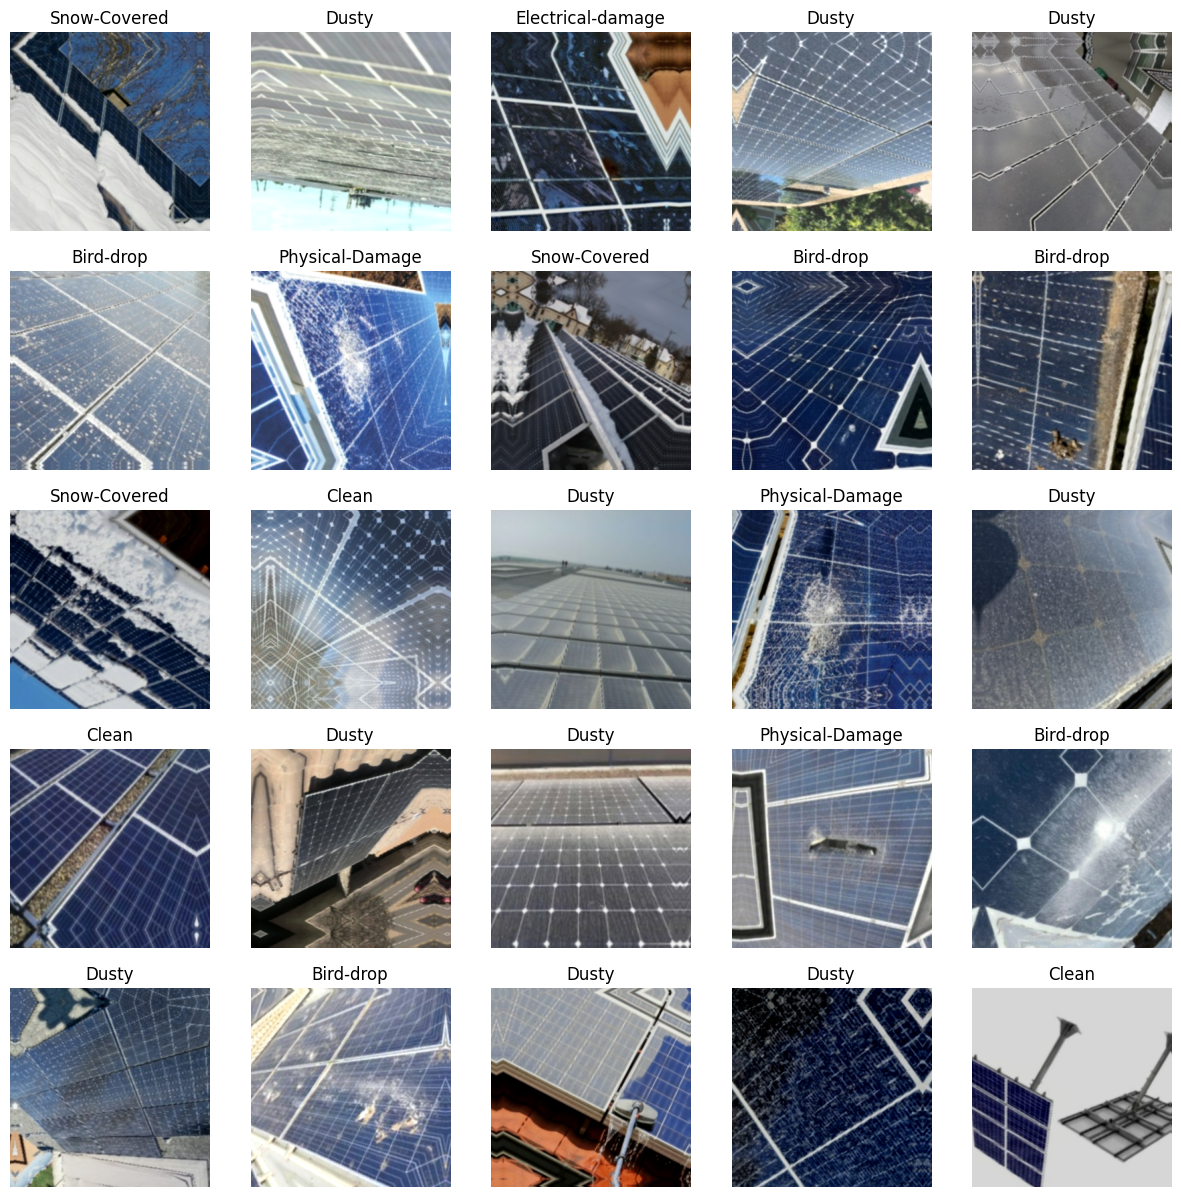

In [5]:
plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [24]:
tf.keras.backend.clear_session()

In [6]:
img_height = 299
img_width = 299
base_model = tf.keras.applications.VGG16(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [7]:
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = tf.keras.applications.vgg16.preprocess_input(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(len(class_names), activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 299, 299, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 299, 299, 3)       0         
 )                                                               
                                                                 
 vgg16 (Functional)          (None, 9, 9, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                             

In [8]:
pip install pydot


In [9]:
pip install visualkeras


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 16.9 MB/s eta 0:00:00


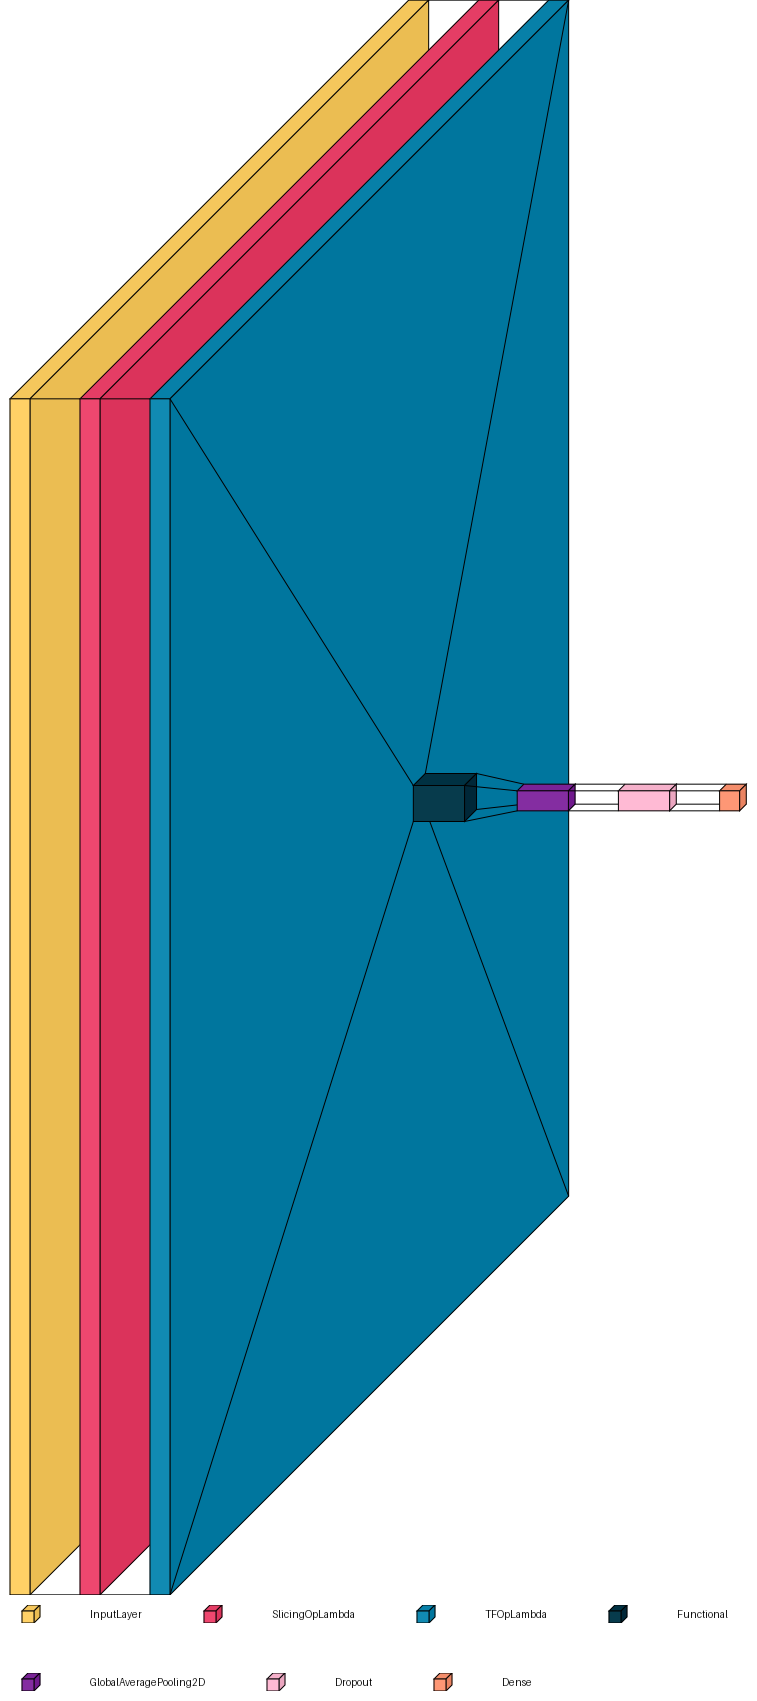

In [10]:
import visualkeras
visualkeras.layered_view(model,legend=True,spacing=50,background_fill = 'white')

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epoch = 15
model.fit(train_ds, validation_data=val_ds, epochs=epoch,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor="val_loss",
            min_delta=1e-2,
            patience=3,
            verbose=1,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)
    ]

)

Epoch 1/15
22/22 [==============================] - 1029s 47s/step - loss: 3.7165 - accuracy: 0.2672 - val_loss: 2.5480 - val_accuracy: 0.3468 - lr: 0.0010
Epoch 2/15
22/22 [==============================] - 1056s 48s/step - loss: 2.8251 - accuracy: 0.3362 - val_loss: 2.0367 - val_accuracy: 0.4220 - lr: 0.0010
Epoch 3/15
22/22 [==============================] - 989s 45s/step - loss: 2.5079 - accuracy: 0.3721 - val_loss: 1.7372 - val_accuracy: 0.4740 - lr: 0.0010
Epoch 4/15
22/22 [==============================] - 973s 44s/step - loss: 2.0205 - accuracy: 0.4569 - val_loss: 1.7206 - val_accuracy: 0.4971 - lr: 0.0010
Epoch 5/15
22/22 [==============================] - 980s 45s/step - loss: 1.8927 - accuracy: 0.4899 - val_loss: 1.5361 - val_accuracy: 0.5376 - lr: 0.0010
Epoch 6/15
22/22 [==============================] - 972s 44s/step - loss: 1.7174 - accuracy: 0.4856 - val_loss: 1.4926 - val_accuracy: 0.5780 - lr: 0.0010
Epoch 7/15
22/22 [==============================] - 985s 45s/step - 

In [12]:
#fine tuning
base_model.trainable = True
for layer in base_model.layers[:14]:
    layer.trainable = False
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 299, 299, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 299, 299, 3)       0         
 )                                                               
                                                                 
 vgg16 (Functional)          (None, 9, 9, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                             

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
epoch = 15
history = model.fit(train_ds, validation_data=val_ds, epochs=epoch,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor="val_loss",
            min_delta=1e-2,
            patience=3,
            verbose=1,
        ),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)
    ]
)

Epoch 1/15
22/22 [==============================] - 1116s 51s/step - loss: 1.1624 - accuracy: 0.5876 - val_loss: 1.1060 - val_accuracy: 0.6994 - lr: 1.0000e-04
Epoch 2/15
22/22 [==============================] - 1117s 51s/step - loss: 0.8710 - accuracy: 0.7069 - val_loss: 0.8783 - val_accuracy: 0.7457 - lr: 1.0000e-04
Epoch 3/15
22/22 [==============================] - 1132s 52s/step - loss: 0.6491 - accuracy: 0.7586 - val_loss: 0.7583 - val_accuracy: 0.7919 - lr: 1.0000e-04
Epoch 4/15
22/22 [==============================] - 1116s 51s/step - loss: 0.5558 - accuracy: 0.8118 - val_loss: 0.8453 - val_accuracy: 0.7919 - lr: 1.0000e-04
Epoch 5/15
22/22 [==============================] - 1116s 51s/step - loss: 0.4510 - accuracy: 0.8261 - val_loss: 1.0344 - val_accuracy: 0.8092 - lr: 1.0000e-04
Epoch 6/15
22/22 [==============================] - 1116s 51s/step - loss: 0.3782 - accuracy: 0.8721 - val_loss: 0.7963 - val_accuracy: 0.8092 - lr: 5.0000e-05
Epoch 6: early stopping


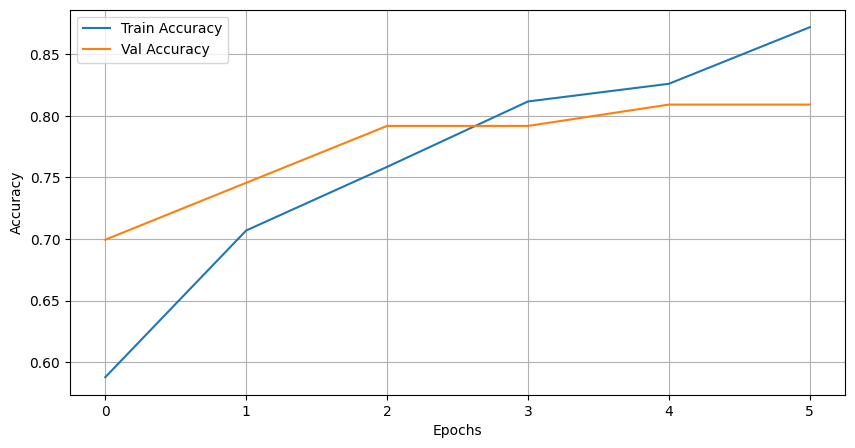

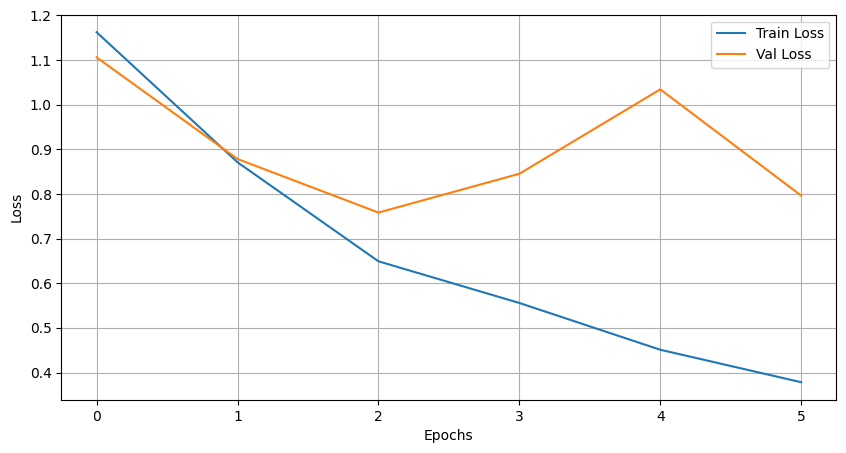

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


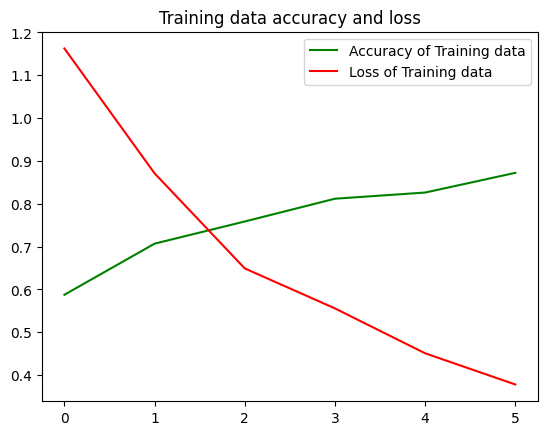

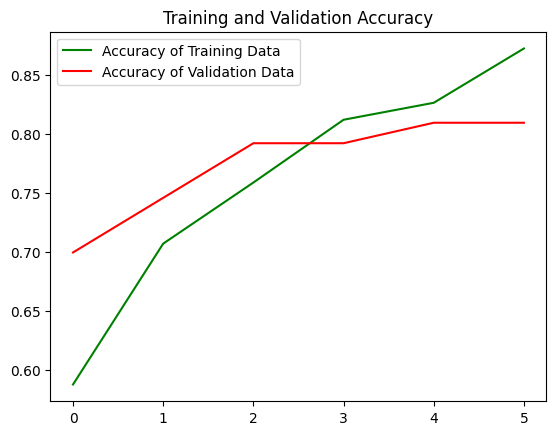

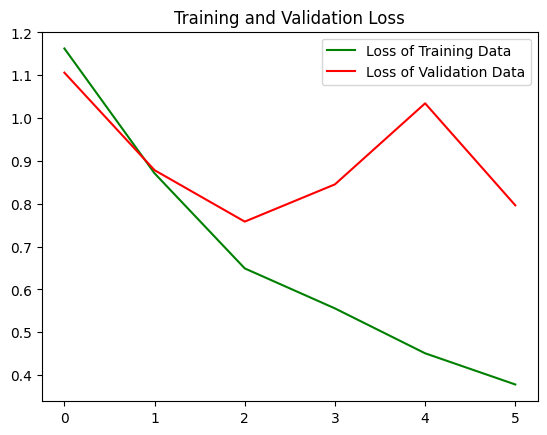

<Figure size 640x480 with 0 Axes>

In [16]:
get_ac = history.history['accuracy']
get_los = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [17]:
model.save("solar_panel_condition_model.hd5")
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [18]:
from tensorflow.keras.models import load_model
model = load_model("/content/solar_panel_condition_model.hd5")
test_loss, test_acc = model.evaluate(val_ds)
print(f"Test accuracy: {test_acc*100:.2f}%")

6/6 [==============================] - 191s 31s/step - loss: 0.7963 - accuracy: 0.8092
Test accuracy: 80.92%


1/1 [==============================] - 1s 932ms/step


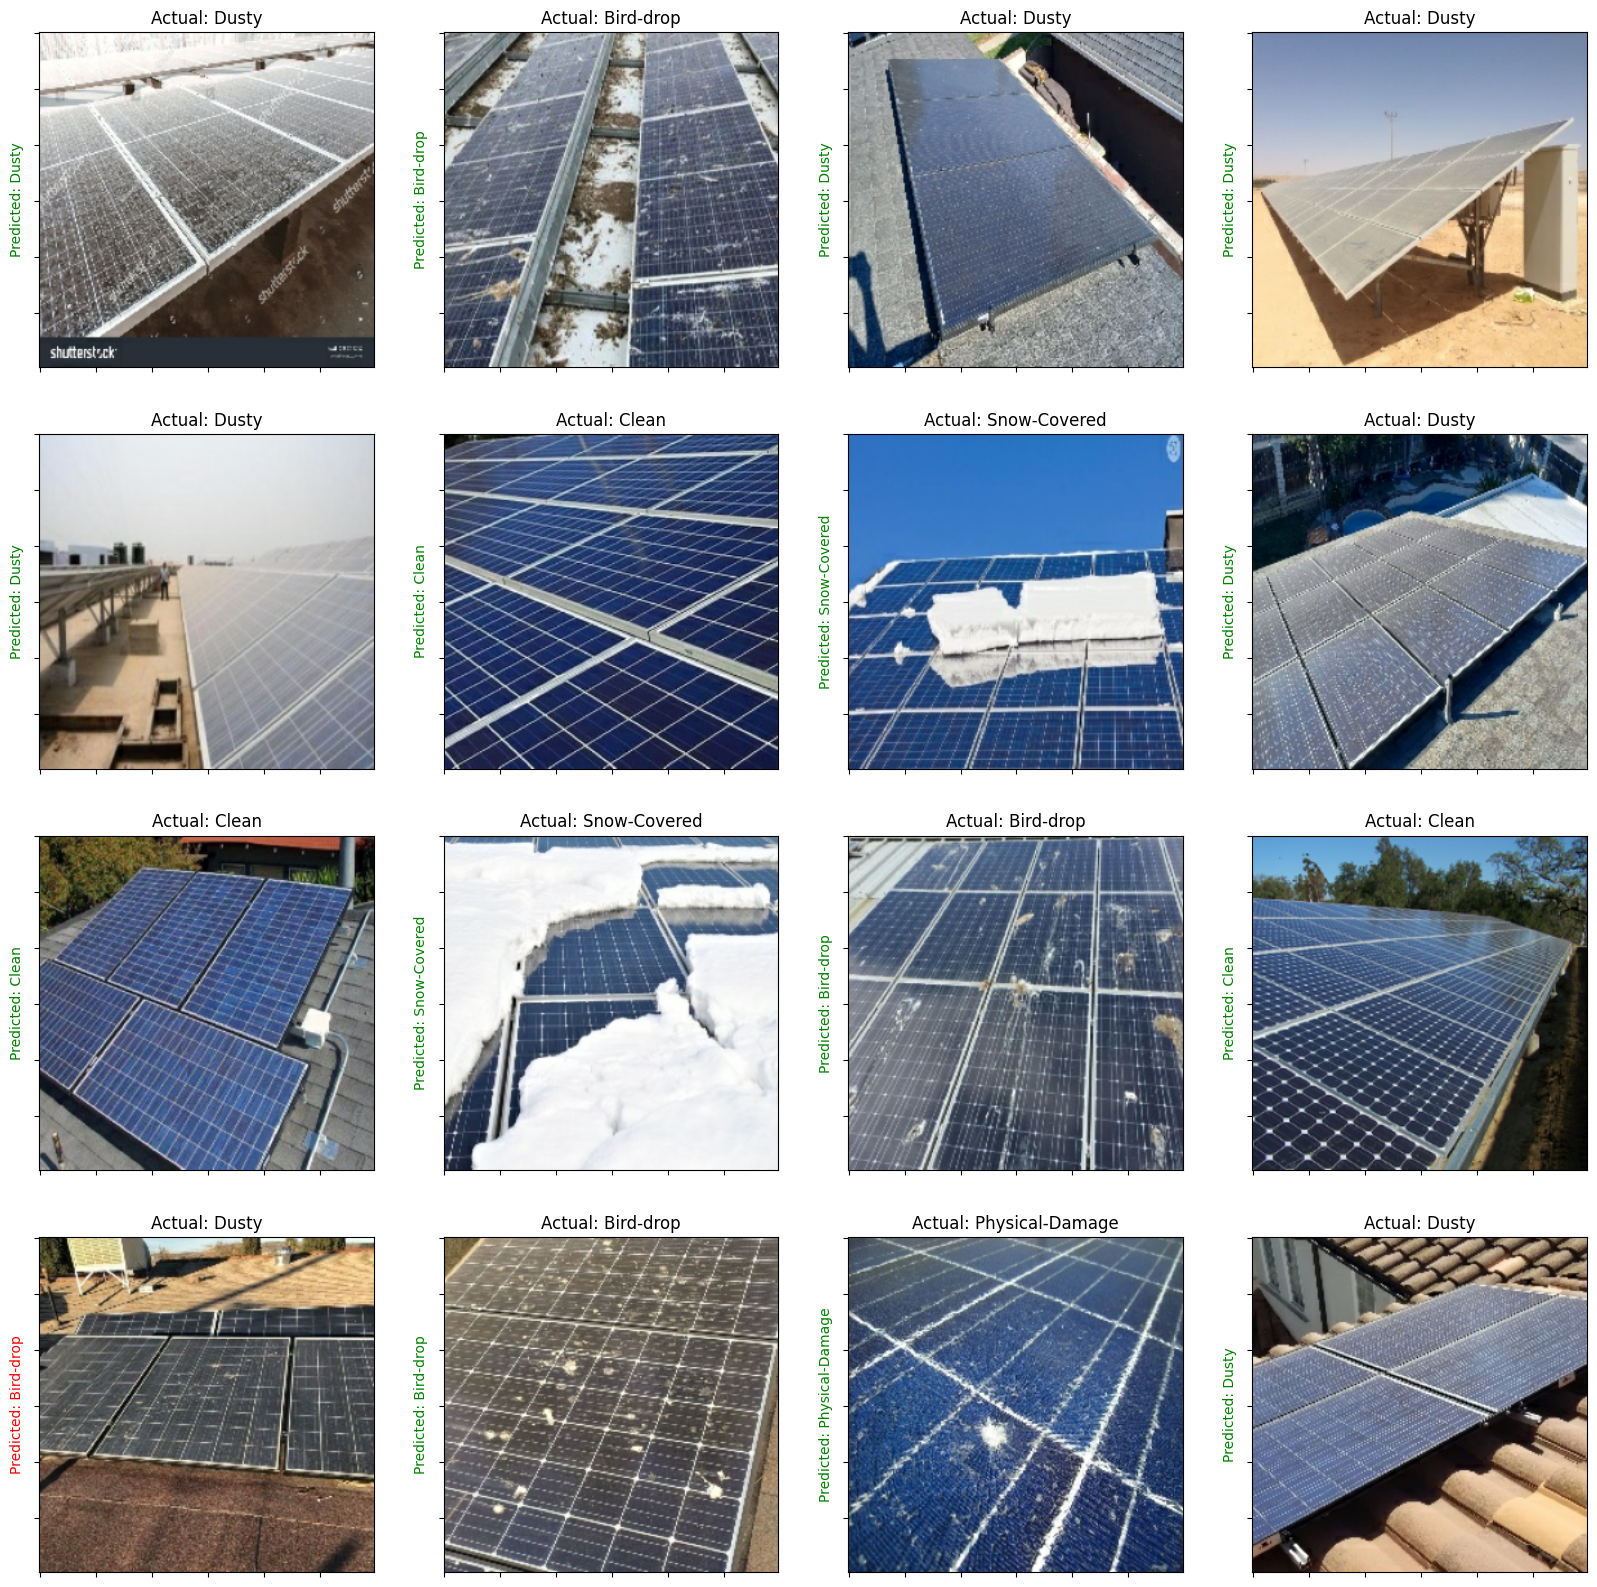

In [19]:
oss, accuracy = model.evaluate(val_ds)

plt.figure(figsize=(20, 20))
for images, labels in val_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})

        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.gca().axes.xaxis.set_ticklabels([])

1/1 [==============================] - 16s 16s/step
Classification Report:

                   precision    recall  f1-score   support

        Bird-drop       0.74      0.93      0.82        40
            Clean       0.77      0.73      0.75        33
            Dusty       0.79      0.81      0.80        47
Electrical-damage       0.89      0.57      0.70        14
  Physical-Damage       0.88      0.79      0.83        19
     Snow-Covered       1.00      0.90      0.95        20

         accuracy                           0.81       173
        macro avg       0.85      0.79      0.81       173
     weighted avg       0.82      0.81      0.81       173



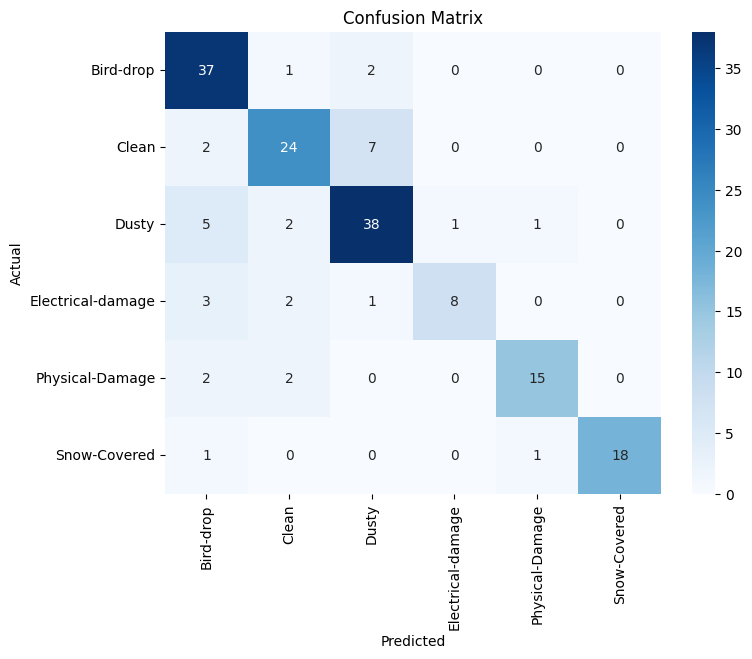

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get true and predicted labels
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [21]:
base_model.trainable = True

for layer in base_model.layers[:10]:
    layer.trainable = False  # keep first few frozen (low-level features)

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epoch = 10
history = model.fit(train_ds, validation_data=val_ds, epochs=epoch,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor="val_loss",
            min_delta=1e-2,
            patience=5,
            verbose=1,
        ),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)
    ]
)

Epoch 1/10
14/22 [==================>...........] - ETA: 5:39 - loss: 0.3079 - accuracy: 0.8862